In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Task 1
Read 256x256 cameraman grayscale image and apply the following edge detection algorithms to the input image

1. Robert Operator
2. Prewitt Operator
3. Sobel Operator
4. Canny Edge Detecter

Use subplot to display the results and comment on the observes result.

In [2]:
img = cv2.imread("cameraman.tif", cv2.IMREAD_GRAYSCALE)

#### 1. Robert's Cross Operator from https://homepages.inf.ed.ac.uk/rbf/HIPR2/roberts.htm

In [3]:
def robert_cross_operator(img):
    Hx = np.array([[1, 0],
                   [0, -1]])
    Hy = np.array([[0, 1],
                   [-1, 0]])
    
    Gx = cv2.filter2D(img, cv2.CV_64F, Hx)
    Gy = cv2.filter2D(img, cv2.CV_64F, Hy)
    
    G = np.sqrt(np.square(Gx) + np.square(Gy))
    return G

#### 2. Prewitt's Gradient Edge Detector from https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm#4

In [4]:
def prewitt_gradient_edge_detector(img):
    Hx = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
    Hy = np.array([[1, 1, 1],
                   [0, 0, 0],
                   [-1, -1, -1]])
    
    Gx = cv2.filter2D(img, cv2.CV_64F, Hx)
    Gy = cv2.filter2D(img, cv2.CV_64F, Hy)
    
    G = np.sqrt(np.square(Gx) + np.square(Gy))
    return G

#### 3. Sobel's Operator

In [5]:
def sobel_operator(img):   
    Hx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    Hy = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])
    Gx = cv2.filter2D(img, cv2.CV_64F, Hx)
    Gy = cv2.filter2D(img, cv2.CV_64F, Hy)
    
    G = np.sqrt(np.square(Gx) + np.square(Gy))
    return G

#### 4. Canny Edge Detector

In [6]:
def canny_edge_detector(img):
    edges = cv2.Canny(img, 100, 200)
    return edges

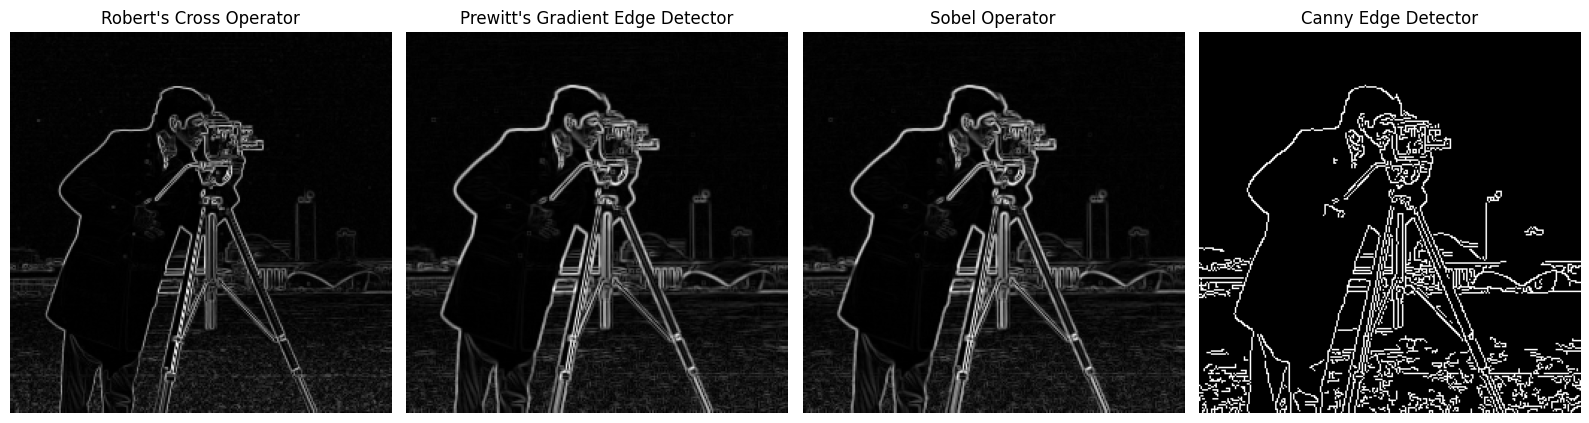

In [7]:
plt.figure(figsize=(16, 16))

plt.subplot(141), plt.imshow(robert_cross_operator(img), cmap='gray'), plt.title("Robert's Cross Operator"), plt.axis('off')
plt.subplot(142), plt.imshow(prewitt_gradient_edge_detector(img), cmap='gray'), plt.title("Prewitt's Gradient Edge Detector"), plt.axis('off')
plt.subplot(143), plt.imshow(sobel_operator(img), cmap='gray'), plt.title("Sobel Operator"), plt.axis('off')
plt.subplot(144), plt.imshow(canny_edge_detector(img), cmap='gray'), plt.title("Canny Edge Detector"), plt.axis('off')

plt.tight_layout()

**Observations:**
- The inbuilt functions for Sobel and Canny produced better results for edges.
- Prewitt's Gradient Edge Detector performs really poorly with a vanilla implementation.

### Task 2
Read 256x256 grayscale image. Apply Krisch Compass masks to tthe input image. Use subplot to display the results.<br>
**Note:** There are 8 Krisch Compass mask to detect edges in different directions.

https://en.wikipedia.org/wiki/Kirsch_operator

In [8]:
# Define the Kirsch Compass masks
kirsch_masks = {
    "N": np.array([[5, 5, 5],
                   [-3, 0, -3],
                   [-3, -3, -3]]),
    "E": np.array([[5, -3, -3],
                   [5, 0, -3],
                   [5, -3, -3]]),
    "W": np.array([[-3, -3, 5],
                   [-3, 0, 5],
                   [-3, -3, 5]]),
    "S": np.array([[-3, -3, -3],
                   [-3, 0, -3],
                   [5, 5, 5]]),
    "NE": np.array([[5, 5, -3],
                    [5, 0, -3],
                    [-3, -3, -3]]),
    "NW": np.array([[-3, 5, 5],
                    [-3, 0, 5],
                    [-3, -3, -3]]),
    "SE": np.array([[-3, -3, -3],
                    [5, 0, -3],
                    [5, 5, -3]]),
    "SW": np.array([[-3, -3, -3],
                    [-3, 0, 5],
                    [-3, 5, 5]])
}

In [9]:
img = cv2.imread("cameraman.tif", cv2.IMREAD_GRAYSCALE)

In [10]:
edge_images = {
    direction: cv2.filter2D(img, cv2.CV_64F, mask)
               for direction, mask in kirsch_masks.items()
}

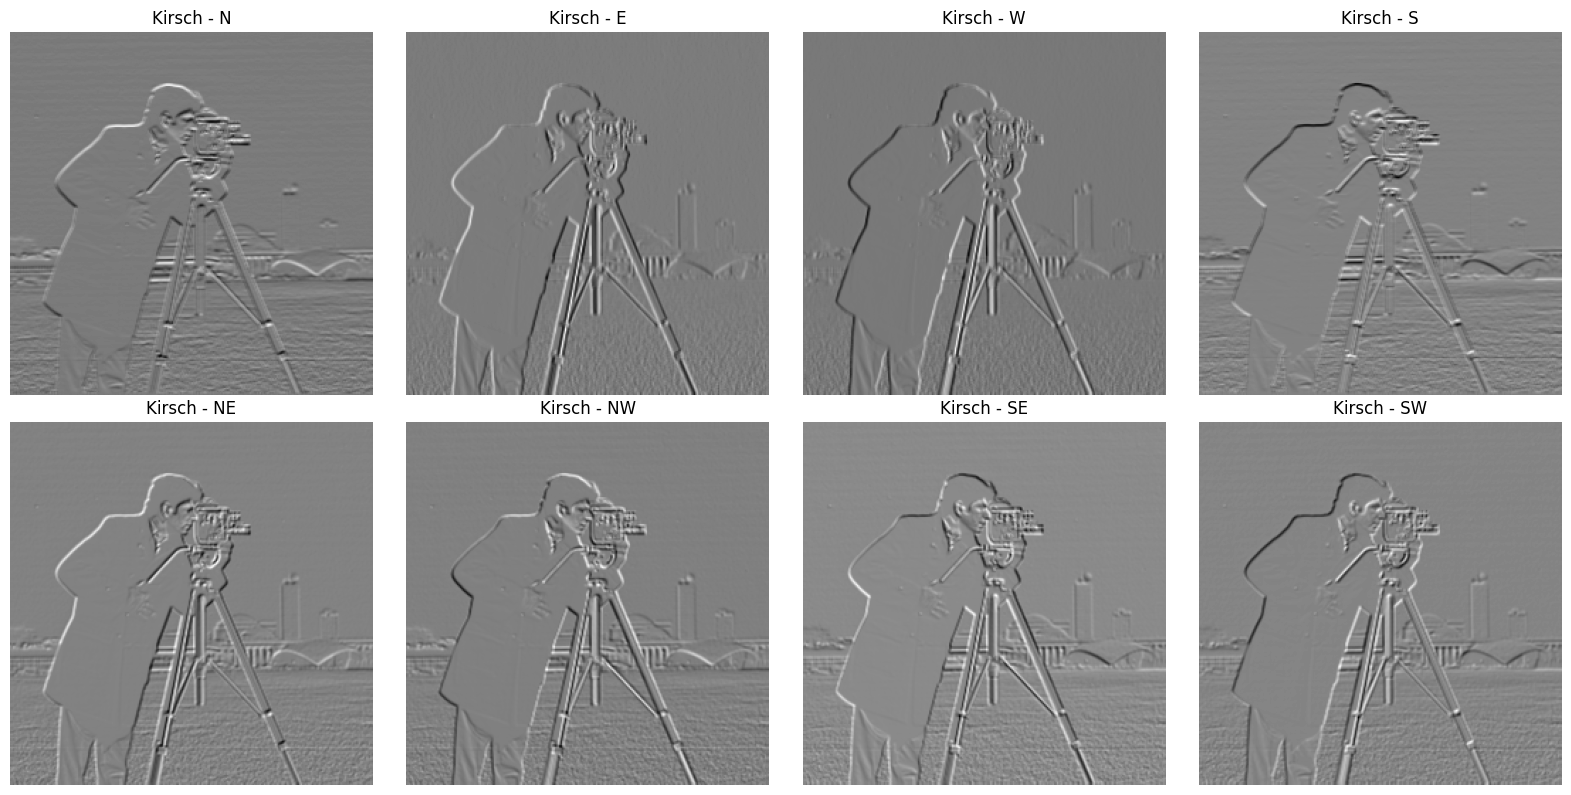

In [11]:
plt.figure(figsize=(16, 8))
for i, (direction, edge_image) in enumerate(edge_images.items()):
    plt.subplot(2, 4, i + 1)
    plt.imshow(edge_image, cmap='gray')
    plt.title(f"Kirsch - {direction}")
    plt.axis('off')
plt.tight_layout()

**Observations:** The edge images show the detected edges for each direction.

### Task 3
Implement the steps employed in Canny edge detection algorithm to the input image. <br>
The steps followed in Canny edge detection are:

1. Gaussian Smoothing of input images
2. Gradient calculation along horizontal and vertical axis
3. Non-maximum suppression of false edges
4. Applying hysteresis thresholding


Resource: https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

In [12]:
img = cv2.imread("cameraman.tif", cv2.IMREAD_GRAYSCALE)

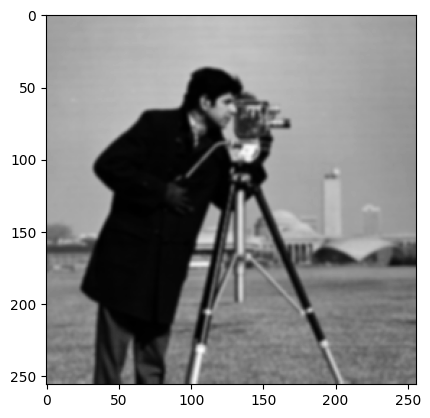

In [13]:
# 1. Gaussian Smoothing of input image with a 5 by 5
img_blurred = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(img_blurred, cmap="gray")

In [14]:
# 2. Gradient calculation along horizontal and vertical axis
Gx = cv2.Sobel(img_blurred, cv2.CV_64F, 1, 0, 3) 
Gy = cv2.Sobel(img_blurred, cv2.CV_64F, 0, 1, 3) 
      
# Conversion of Cartesian coordinates to polar  
img_edge_magnitudes, img_edge_angles = cv2.cartToPolar(Gx, Gy, angleInDegrees=True)

def round_angle(angle):
    if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
        return 0
    elif 22.5 <= angle < 67.5:
        return 45
    elif 67.5 <= angle < 112.5:
        return 90
    else:
        return 135

img_edge_rounded_angles = np.vectorize(round_angle)(img_edge_angles)

In [15]:
# Step 3: Non-maximum Suppression
def non_maximum_suppression(magnitude, angle):
    Z = np.zeros_like(magnitude, dtype=np.float32)
    for i in range(1, magnitude.shape[0] - 1): # q and r could be at 0 or len-1. so we just avoid em.
        for j in range(1, magnitude.shape[1] - 1): # q and r could be at 0 or len-1. so we just avoid em.
            q = 255
            r = 255
            match angle[i, j]:
                case 0: # q | r
                    q = magnitude[i, j + 1]
                    r = magnitude[i, j - 1]
                case 45: # q \ r
                    q = magnitude[i + 1, j - 1]
                    r = magnitude[i - 1, j + 1]
                case 90: # q
                         # -
                         # r   
                    q = magnitude[i + 1, j]
                    r = magnitude[i - 1, j]
                case 135: # q / r
                    q = magnitude[i - 1, j - 1]
                    r = magnitude[i + 1, j + 1]

            # check if local maxima, purge otherwise
            if magnitude[i, j] >= max(q, r):
                Z[i, j] = magnitude[i, j]
            else:
                Z[i, j] = 0
    return Z

img_non_max = non_maximum_suppression(img_edge_magnitudes, img_edge_rounded_angles)

In [16]:
# Step 4: Hysteresis Thresholding
def hysteresis_thresholding(img, min_val, max_val):
    M, N = img.shape
    STRONG, WEAK = 255, 25
    
    strong_i, strong_j = np.where(img >= max_val)
    weak_i, weak_j = np.where((img <= max_val) & (img >= min_val))
    
    res = np.zeros((M, N))
    res[strong_i, strong_j] = STRONG
    res[weak_i, weak_j] = WEAK

    # going thru the weaklings and checking if there's a connection to a sure edge
    # for i in range(1, M-1):
    #     for j in range(1, N-1):
    #         if res[i, j] == WEAK:
    #             if ((res[i + 1, j - 1] == strong) or (res[i + 1, j] == strong) or (res[i + 1, j + 1] == strong)
    #                     or (res[i, j - 1] == strong) or (res[i, j + 1] == strong)
    #                     or (res[i - 1, j - 1] == strong) or (res[i - 1, j] == strong) or (res[i - 1, j + 1] == strong)):
    #                 res[i, j] = strong
    #             else:
    #                 res[i, j] = 0

    # better yet, go thru the strong ones and check for weak connections
    for r, c in np.argwhere(res == STRONG):
        for i in [-1,0,1]:
            for j in [-1, 0, 1]:
                if 0 <= r + i < M and 0 <= c + j < N and res[r + i, c + j] == WEAK:
                    res[r + i, c + j] = STRONG
    return res

img_canny_edges = hysteresis_thresholding(img_non_max, 50, 150)

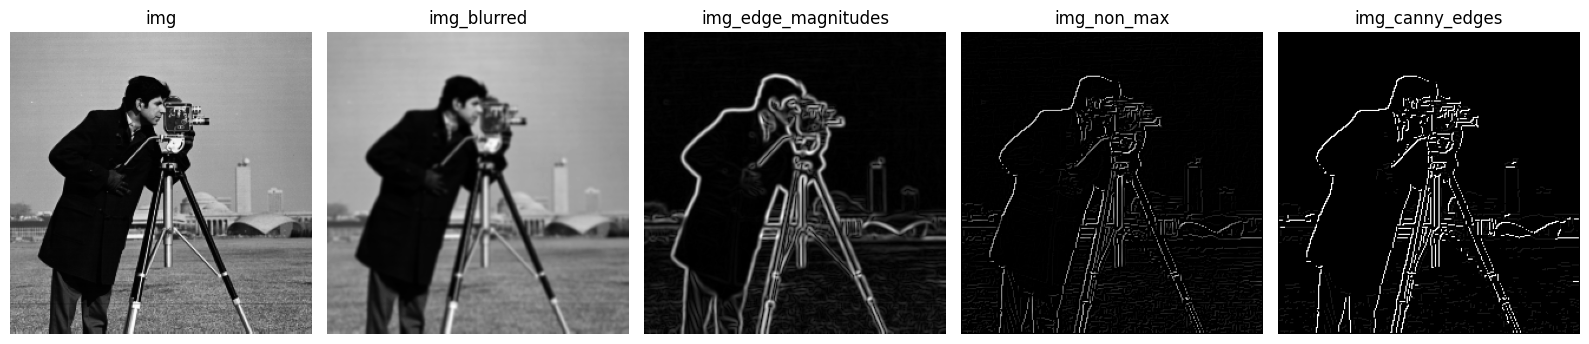

In [17]:
plt.figure(figsize=(16, 16))

plt.subplot(151), plt.imshow(img, cmap='gray'), plt.title("img"), plt.axis('off')
plt.subplot(152), plt.imshow(img_blurred, cmap='gray'), plt.title("img_blurred"), plt.axis('off')
plt.subplot(153), plt.imshow(img_edge_magnitudes, cmap='gray'), plt.title("img_edge_magnitudes"), plt.axis('off')
plt.subplot(154), plt.imshow(img_non_max, cmap='gray'), plt.title("img_non_max"), plt.axis('off')
plt.subplot(155), plt.imshow(img_canny_edges, cmap='gray'), plt.title("img_canny_edges"), plt.axis('off')

plt.tight_layout()

### Task 4
Generate `3x3`, `5x5`, `7x7` and `9x9` Laplacian of Gaussian (LoG) mask and apply it to the input test image. Comment on the observed result.

In [18]:
img = cv2.imread("cameraman.tif", cv2.IMREAD_GRAYSCALE)

In [19]:
# Function to generate LoG masks
def generate_log_mask(size, sigma):
    half_size = size // 2
    x, y = np.meshgrid(np.arange(-half_size, half_size+1), np.arange(-half_size, half_size+1))
    normal = 1 / (2.0 * np.pi * sigma**2)
    laplacian = (x**2 + y**2 - 2.0 * sigma**2) / (sigma**4)
    gauss = np.exp(-(x**2 + y**2) / (2.0 * sigma**2))
    log = normal * laplacian * gauss
    return log - log.mean()

In [20]:
# Generate LoG masks of different sizes
sizes = [3, 5, 7, 9]
log_masks = [generate_log_mask(size, 1) for size in sizes]

# Apply LoG filters to the image
log_results = [cv2.filter2D(img, -1, log_mask) for log_mask in log_masks]

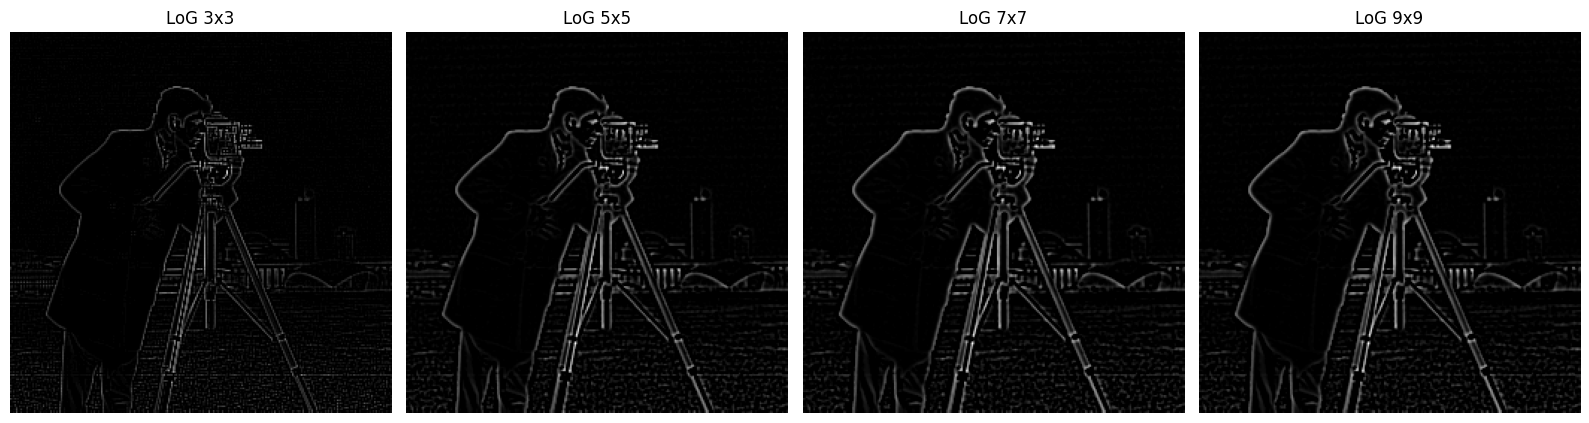

In [21]:
plt.figure(figsize=(16, 8))
for i, (size, log_result) in enumerate(zip(sizes, log_results)):
    plt.subplot(1, 4, i+1)
    plt.imshow(log_result, cmap="gray")
    plt.title(f"LoG {size}x{size}")
    plt.axis("off")
plt.tight_layout()

**Observations:** Larger masks smoothens to a greater extent than the smaller masks.

### Task 5
Read `256x256` grayscale cameraman image. Divide the image into `8x8` subblocks. Apply `3x3` low pass filter mask to each subblock. Combine the subblock to form the `256x256` image and comment on the observed result.

In [22]:
img = cv2.imread("cameraman.tif", cv2.IMREAD_GRAYSCALE)
height, width = img.shape
img_reshaped = img.reshape(height // 8, 8, -1, 8).swapaxes(1, 2).reshape(-1, 8, 8) # ooof

In [23]:
low_pass_filter = np.ones((3, 3), np.float32) / 9
filtered_blocks = np.array([cv2.filter2D(block, -1, low_pass_filter) for block in img_reshaped])

In [24]:
filtered_img = filtered_blocks.reshape(height // 8, width // 8, 8, 8).swapaxes(1, 2).reshape(height, width)

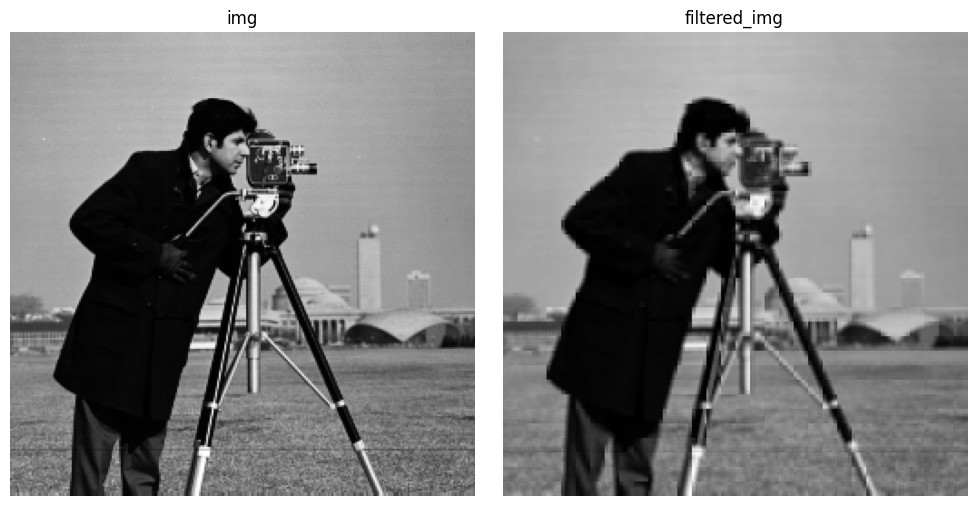

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(121), plt.title('img'), plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(122), plt.title('filtered_img'), plt.imshow(filtered_img, cmap='gray'), plt.axis('off')

plt.tight_layout()

**Observation:** The LPF applied on the `8x8` blocks gives more _localized-to-the-block_ results than being applied over an entire image.